In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

# Лабораторная работа №1. Питон для математиков. Вариант 1

# Создание матрицы. Вычисление определителя.

1. Создать матрицу 5x5 случайных целых чисел принадлежащих отрезку [0, 10]. Вычислить ее определитель.

In [10]:
matrix = np.random.randint(0, 10, (5, 5))
matrix

array([[9, 2, 3, 9, 5],
       [7, 8, 6, 1, 0],
       [1, 3, 8, 5, 8],
       [1, 0, 0, 0, 2],
       [8, 3, 9, 4, 5]])

In [11]:
transposed_matrix = matrix.T
transposed_matrix

array([[9, 7, 1, 1, 8],
       [2, 8, 3, 0, 3],
       [3, 6, 8, 0, 9],
       [9, 1, 5, 0, 4],
       [5, 0, 8, 2, 5]])

In [12]:
determinant = np.linalg.det(transposed_matrix)
determinant

7610.00000000001

# Умножение матриц

In [13]:
vector = np.random.randint(0, 10, (5, 1))
matrix_2 = np.random.randint(0, 10, (5, 5))
result = np.dot(matrix_2, vector)
print('B=', vector)
print('C=', matrix_2)
print('B*C=', result)


B= [[2]
 [9]
 [8]
 [2]
 [0]]
C= [[4 0 4 3 5]
 [0 1 7 0 2]
 [2 8 9 8 8]
 [3 4 9 4 4]
 [5 8 4 3 4]]
B*C= [[ 46]
 [ 65]
 [164]
 [122]
 [120]]


# Решение системы линейных уравнений.

In [14]:

M2 = np.array([[1, 0, -1], [-1, -1, 3], [1, -2, -4]], int) # Матрица (левая часть системы)
v2 = np.array([1, -3, 5], int) # Вектор (правая часть системы)

np.linalg.solve(M2, v2)

array([-0.14285714, -0.28571429, -1.14285714])

# Вычисление интеграла с помощью SciPy

Вычислите интеграл $$\int _0 ^1 \sqrt{x} + \sqrt[3]{x^2} \, dx$$

In [16]:

result, error = integrate.quad(lambda x: np.sqrt(x) + np.cbrt(x**2), 0, 1)
result


1.2666666666666673

Вычислите интеграл $$\int_{-1}^{1} dy \int_{2y}^{2} (x - y) e^y \, dx$$

In [19]:
def inner_integral(y):
    return integrate.quad(lambda x: (x - y) * np.exp(y), 2*y, 2)[0]
result, error = integrate.quad(inner_integral, -1, 1)
result

3.2292870098894366

# Построение графиков функций с помощью Mathplotlib

Построить в одной системе координат графики функций: y = cos(x) + 2, y = -x + 2
Оси координат должны быть подписаны, графики должны быть разного цвета, должна быть выведена легенда.

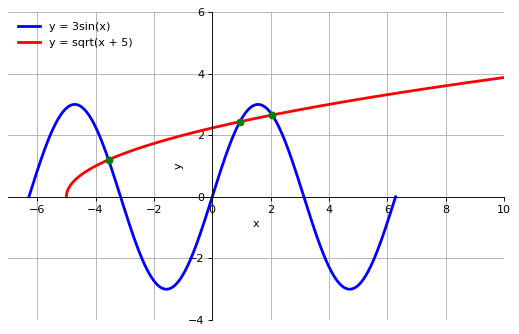

In [27]:
# Найдем тачки пересечения

def find_intersections(f1, f2, x_values, tolerance=1e-5):
    intersections = []
    for i in range(len(x_values) - 1):
        x_left, x_right = x_values[i], x_values[i + 1]
        y_left, y_right = f1(x_left) - f2(x_left), f1(x_right) - f2(x_right)
        
        if y_left * y_right <= 0:  # Значит есть пересечение
            while abs(x_right - x_left) > tolerance:
                x_mid = (x_left + x_right) / 2
                y_mid = f1(x_mid) - f2(x_mid)
                if y_left * y_mid <= 0:
                    x_right = x_mid
                    y_right = y_mid
                else:
                    x_left = x_mid
                    y_left = y_mid
            intersections.append((x_left + x_right) / 2)
    return intersections

# Определение функций
def f1(x):
    return 3 * np.sin(x)

def f2(x):
    return np.sqrt(x + 5)

# Диапазон значений x
x_values = np.linspace(-5, 5, 1000)

# Нахождение всех точек пересечения
intersections_x = find_intersections(f1, f2, x_values)
intersections_y = [f1(x) for x in intersections_x]

# Построение графика
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# Удаление правой и верхней границ
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Установить направление данных на координатной оси
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# Подготовить данные для функций
x1 = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y1 = f1(x1)

x2 = np.linspace(-5, 10, 1000)
y2 = f2(x2)

# Построение графиков
plt.plot(x1, y1, color="blue", linewidth=2.5, label="y = 3sin(x)")
plt.plot(x2, y2, color="red", linewidth=2.5, label="y = sqrt(x + 5)")

# Ограничение осей
plt.xlim(-7, 10)
plt.ylim(-4, 6)

# Подписи осей
plt.xlabel("x")
plt.ylabel("y")

# Добавление легенды
plt.legend(loc='upper left', frameon=False)

# Отображение всех точек пересечения
ax.scatter(intersections_x, intersections_y, c='g', zorder=5, label='Intersection')

# Добавление сетки
plt.grid(True)

# Отображение графика
plt.show()